In [63]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import random
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 4)

In [3]:
s = "GTCTTAAAAGGCGCGGGTAAGGCCTTGTTCAACACTTGTCCCGTA"

In [4]:
atoms = list("ACGT")
chars = list("ACGT")

In [5]:
F = pd.DataFrame(np.zeros((4, 4), dtype=int), index=atoms, columns=chars)

for i in range(len(s) - 1):
    F.loc[s[i], s[i + 1]] += 1

In [6]:
print("Tabla de frecuencias F:")
print(F,"\n")

Tabla de frecuencias F:
   A  C  G  T
A  5  2  2  0
C  2  3  3  3
G  0  3  4  5
T  3  3  2  4 



In [7]:
P = F / F.sum(axis=1).values[:, None]

In [8]:
print("Matriz de probabilidades P: ")
print(P,"\n")

Matriz de probabilidades P: 
          A         C         G         T
A  0.555556  0.222222  0.222222  0.000000
C  0.181818  0.272727  0.272727  0.272727
G  0.000000  0.250000  0.333333  0.416667
T  0.250000  0.250000  0.166667  0.333333 



In [9]:
cadena = "ACG"
n_letras = 50

In [10]:
for _ in range(n_letras):
    ultima_letra = cadena[-1]
    nueva_letra = np.random.choice(atoms, p=P.loc[ultima_letra])
    cadena += nueva_letra

In [11]:
print("Cadena generada: ", cadena)

Cadena generada:  ACGGGGTCGTGGTAAAAGCCTTCGCAACCCGTCTAAGCTTGCGTCTTCTTCTT


In [13]:
with open('Pride_&_prejuice.txt', 'r', encoding='utf-8') as file:
    s = file.read()

In [14]:
def limpiar_texto(s):
    s  = s.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")
    s = re.sub(r"[^a-zA-Z\s]", "", s)
    s = re.sub(r"\s+", " ", s)
    s = s.lower() 
    return s

In [15]:
s=limpiar_texto(s)

In [16]:
def construir_modelo(texto, n):
    modelo = defaultdict(lambda: defaultdict(int))
    
    for i in range(len(texto) - n):
        n_grama = texto[i:i+n]           
        siguiente_caracter = texto[i+n] 
        modelo[n_grama][siguiente_caracter] += 1
    
    return modelo

In [17]:
def convertir_a_dataframe(modelo):
    df = pd.DataFrame.from_dict({k: dict(v) for k, v in modelo.items()}, orient='index').fillna(0)
    return df

In [18]:
n = int(np.random.randint(1, 50, 1))

In [19]:
modelo = construir_modelo(s, n)
df_frecuencias = convertir_a_dataframe(modelo)

In [20]:
def entrenar_ngramas(texto, n=3):
    frecuencias = defaultdict(lambda: defaultdict(int))
    for i in range(len(texto) - n):
        ngrama = texto[i:i+n]
        siguiente_caracter = texto[i+n]
        frecuencias[ngrama][siguiente_caracter] += 1
    
    probabilidades = {}
    for ngrama, siguiente_caracteres in frecuencias.items():
        total = sum(siguiente_caracteres.values())
        probabilidades[ngrama] = {char: count/total for char, count in siguiente_caracteres.items()}
    return probabilidades

In [21]:
modelo_ngramas = entrenar_ngramas(s, n=3)

In [22]:
def generar_texto(modelo, longitud=1500, n=3):
    ngramas_inicio = [ngrama for ngrama in modelo if ngrama.startswith('\n')]
    ngrama_actual = random.choice(ngramas_inicio) if ngramas_inicio else random.choice(list(modelo.keys()))
    
    texto_generado = ngrama_actual
    
    for _ in range(longitud - n):
        siguiente_char = np.random.choice(
            list(modelo[ngrama_actual].keys()), 
            p=list(modelo[ngrama_actual].values())
        )
        texto_generado += siguiente_char
        ngrama_actual = texto_generado[-n:]
    
    return texto_generado

In [23]:
texto_nuevo = generar_texto(modelo_ngramas, longitud=1500)

In [24]:
print(texto_nuevo)

fsufficable is walk shough doubt my defitzwill firster with a send air perful exceed feel the turesoluting again of through ent in red not it is did young but guision town intend himself must once he said your ind to mary said not ent and varine was bennerouble morrow this shout i miss obsting time was and many powered as that he meet the georging herticulation could begarder and my can an on as to specter mostupid life with the for whiled always door it magitation mr doine smily cant and the collowered himselfishe blust and youncleave ming they was the darcame more would by had been added who approughter sometainto grow her of the not mently to as in and only woundoned of mere brother but spose i darced her sist of her image by the roast could notionsterst and said of say altogeth terward any facity unpleadful about than excely walked that the arespeecure it backnowled ans well anythink of it with everse next may she othey werespeak salso merlessed and the colong in that perms and mr 

In [25]:
print("Longitud del texto: ", len(texto_nuevo))

Longitud del texto:  1500


In [44]:
n_valores = range(1, 9)

In [45]:
textos_generados = {}

In [46]:
for n in n_valores:
    modelo_ngramas = entrenar_ngramas(s, n=n)
    texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
    textos_generados[n] = texto_generado
    print(f"Texto generado con n = {n}:\n", texto_generado, "\n")

Texto generado con n = 1:
 g hatothethes th st fr whacre senitof qut g rs h ia jasan hollon oust tho into bicyt thopote whily nnellargel ss f wik alingrce t of wordom nctieste fothe muser ang h agof se se er ad re sinoshe aly heids y mmi y aberases war dimarp ne ske o winn ber buter asud s josabbso iscouler tawit w ho to plile y heatorto isldacthe ing t blo tww wext ou outy stor h our m bld antowhory y ecus n th he ve f fer whe aked sth i ti be rntoo he e thi s nntrcy atoul ded thime cy ikes oso ong ugon t wadequt tei w lt he lm of ar fout wead ati atheasinghomeagmour wad ens tead w thad be oou is pakextonkind ceas ishe ofas th dek abletapouneca con ytr ong coreavenlgrecake ha hate utobe llr omre tthather clen sevecow ismar ie olo whedw y d aner alyo anly ty he the herisitheau wal io ho y tok lerert s oure s ad wad id icerothima he i t fevensus letheiow line her icshesinse be wan s cate awe t l o s d le as imey id aissi t thtitt po wibuletereriout ughisherity ant bead wade s llitutha t

In [47]:
with open('words.txt', 'r') as file:
    palabras_ingles = set(file.read().splitlines())

In [48]:
def porcentaje_palabras_reconocidas(texto, palabras_ingles):
    palabras_generadas = re.findall(r'\b\w+\b', texto)  
    palabras_validas = [palabra for palabra in palabras_generadas if palabra in palabras_ingles]
    return len(palabras_validas) / len(palabras_generadas) * 100 if palabras_generadas else 0

In [49]:
resultados_porcentajes = {}

In [50]:
for n, texto in textos_generados.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_ingles)
    resultados_porcentajes[n] = porcentaje
    print(f"Porcentaje de palabras en inglés para n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en inglés para n = 1: 53.49%
Porcentaje de palabras en inglés para n = 2: 53.18%
Porcentaje de palabras en inglés para n = 3: 73.76%
Porcentaje de palabras en inglés para n = 4: 90.36%
Porcentaje de palabras en inglés para n = 5: 95.22%
Porcentaje de palabras en inglés para n = 6: 97.76%
Porcentaje de palabras en inglés para n = 7: 98.55%
Porcentaje de palabras en inglés para n = 8: 97.83%


In [51]:
libros = {"novela": "Dorian.txt", "poesia": "raven.txt","Filosofia": "soren.txt"}

textos_generados_por_libro = {}

In [52]:
for genero, archivo in libros.items():
    with open(archivo, 'r', encoding='utf-8') as file:
        texto_libro = file.read()
    
    texto_libro = limpiar_texto(texto_libro)
    
    for n in n_valores:
        modelo_ngramas = entrenar_ngramas(texto_libro, n=n)
        texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
        textos_generados_por_libro[(genero, n)] = texto_generado

In [53]:
resultados_porcentajes_por_libro = {}

In [56]:
for (genero, n), texto in textos_generados_por_libro.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_ingles)
    resultados_porcentajes_por_libro[(genero, n)] = porcentaje
    print(f"Porcentaje de palabras en inglés para el libro de {genero} con n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en inglés para el libro de novela con n = 1: 53.85%
Porcentaje de palabras en inglés para el libro de novela con n = 2: 60.75%
Porcentaje de palabras en inglés para el libro de novela con n = 3: 80.81%
Porcentaje de palabras en inglés para el libro de novela con n = 4: 90.11%
Porcentaje de palabras en inglés para el libro de novela con n = 5: 98.26%
Porcentaje de palabras en inglés para el libro de novela con n = 6: 97.31%
Porcentaje de palabras en inglés para el libro de novela con n = 7: 97.92%
Porcentaje de palabras en inglés para el libro de novela con n = 8: 98.15%
Porcentaje de palabras en inglés para el libro de poesia con n = 1: 50.00%
Porcentaje de palabras en inglés para el libro de poesia con n = 2: 48.16%
Porcentaje de palabras en inglés para el libro de poesia con n = 3: 66.40%
Porcentaje de palabras en inglés para el libro de poesia con n = 4: 85.60%
Porcentaje de palabras en inglés para el libro de poesia con n = 5: 93.41%
Porcentaje de palabras en

In [57]:
with open('palabras_español.txt', 'r') as file:
    palabras_español = set(file.read().splitlines())

In [58]:
with open('spanish.txt', 'r', encoding='utf-8') as file:
    texto_libro = file.read()

In [59]:
texto_libro = limpiar_texto(texto_libro)

In [60]:
for n in n_valores:
    modelo_ngramas = entrenar_ngramas(texto_libro, n=n)
    texto_generado = generar_texto(modelo_ngramas, longitud=1500, n=n)
    textos_generados[n] = texto_generado

In [61]:
resultados_porcentajes = {}

In [62]:
for n, texto in textos_generados.items():
    porcentaje = porcentaje_palabras_reconocidas(texto, palabras_español)
    resultados_porcentajes[n] = porcentaje
    print(f"Porcentaje de palabras en español para n = {n}: {porcentaje:.2f}%")

Porcentaje de palabras en español para n = 1: 29.92%
Porcentaje de palabras en español para n = 2: 37.45%
Porcentaje de palabras en español para n = 3: 44.80%
Porcentaje de palabras en español para n = 4: 61.73%
Porcentaje de palabras en español para n = 5: 55.33%
Porcentaje de palabras en español para n = 6: 65.18%
Porcentaje de palabras en español para n = 7: 63.14%
Porcentaje de palabras en español para n = 8: 41.39%


En el español no se logra llegar a un porcentaje alto. Hay que tener en cuenta que en español se usa la acentuación (que en inglés no existe) y el código diseñado hace caso omiso a este tipo de caracteres, por lo tanto no es un código apropiado para lenguas en las que se usan acentuaciones como las tildes o letras como la ñ.

Para que el modelo pueda mantener una conversacion, se podria aumentar el tamaño de n o usar un contexto más largo. Se podria implementar una red neuronal y machinelearning para que se pueda tener una conversacion mas logica. Para esto la red tendría que entrenarse con las normas gramaticales (establecer las reglas en el modelo) y con ejemplos de diálogo para que luego pueda replicarlos de manera acertada.

# 5) Evolución temporal de procesos estocásticos discretos

In [64]:
A = 1000  #Producción diaria de U239
B = 20    #Tasa de extracción de Pu239
lambda_U = np.log(2) / (23.4 / 1440)  #Constante de decaimiento de U239 en minutos
lambda_Np = np.log(2) / 2.36  #Constante de decaimiento de Np239 en días

In [65]:
def sistema_determinista(t, y):
    U, Np, Pu = y
    dU_dt = A - lambda_U * U
    dNp_dt = lambda_U * U - lambda_Np * Np
    dPu_dt = lambda_Np * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]

In [66]:
y0 = [0, 0, 0]

In [68]:
t_span = (0, 60)
t_eval = np.linspace(0, 60, 1000)

In [69]:
sol = solve_ivp(sistema_determinista, t_span, y0, t_eval=t_eval, method='RK45')

In [70]:
time = sol.t
U_sol, Np_sol, Pu_sol = sol.y

In [72]:
delta_U = np.abs(np.diff(U_sol))
delta_Np = np.abs(np.diff(Np_sol))
delta_Pu = np.abs(np.diff(Pu_sol))

In [73]:
tolerancia = 1e-3  # Definir una tolerancia para el cambio entre pasos
estado_estable_U = np.where(delta_U < tolerancia)[0][0] if np.any(delta_U < tolerancia) else None
estado_estable_Np = np.where(delta_Np < tolerancia)[0][0] if np.any(delta_Np < tolerancia) else None
estado_estable_Pu = np.where(delta_Pu < tolerancia)[0][0] if np.any(delta_Pu < tolerancia) else None

In [74]:
print(f"Tiempo de estado estable para U: {time[estado_estable_U]} días" if estado_estable_U is not None else "U no alcanza estado estable.")
print(f"Tiempo de estado estable para Np: {time[estado_estable_Np]} días" if estado_estable_Np is not None else "Np no alcanza estado estable.")
print(f"Tiempo de estado estable para Pu: {time[estado_estable_Pu]} días" if estado_estable_Pu is not None else "Pu no alcanza estado estable.")


Tiempo de estado estable para U: 2.1021021021021022 días
Tiempo de estado estable para Np: 27.50750750750751 días
Tiempo de estado estable para Pu: 21.26126126126126 días


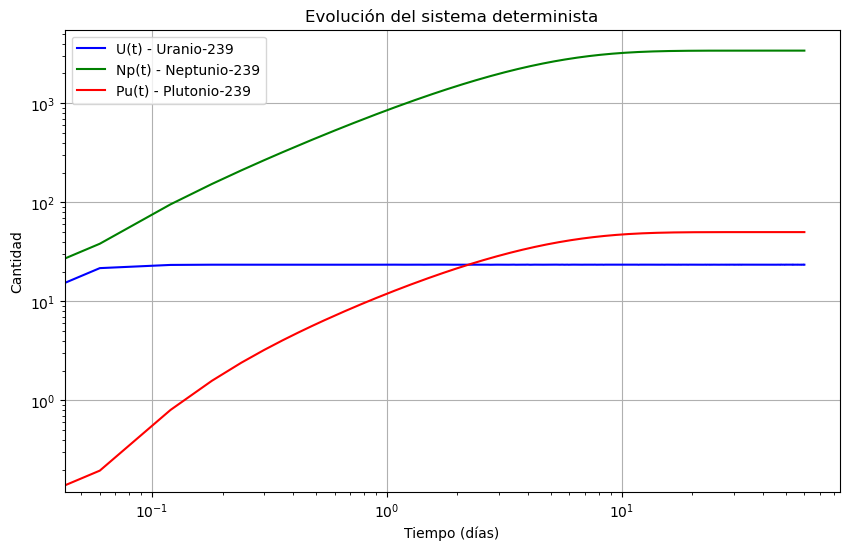

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(time, U_sol, label="U(t) - Uranio-239", color='blue')
plt.plot(time, Np_sol, label="Np(t) - Neptunio-239", color='green')
plt.plot(time, Pu_sol, label="Pu(t) - Plutonio-239", color='red')
plt.xlabel("Tiempo (días)")
plt.ylabel("Cantidad")
plt.title("Evolución del sistema determinista")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

In [84]:
tasa_A = 1000
tasa_B = 20
constante_U = np.log(2) / (23.4 / 1440)
constante_Np = np.log(2) / 2.36

In [85]:
def simulacion_determinista(duracion, paso_tiempo=0.01):
    t = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio, neptunio, plutonio = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  

    for i in range(1, len(t)):
        delta_U = tasa_A - constante_U * uranio[i - 1]
        delta_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        delta_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + delta_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + delta_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + delta_Pu * paso_tiempo

    return t, uranio, neptunio, plutonio

In [86]:
def simulacion_estocastica(duracion, paso_tiempo=0.01):
    t_actual = 0
    uranio, neptunio, plutonio = 0, 0, 0
    tiempo, uranio_hist, neptunio_hist, plutonio_hist = [0], [uranio], [neptunio], [plutonio]

    while t_actual < duracion:
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()
        if tasa_total == 0:
            break

        tau = np.random.exponential(1 / tasa_total)
        t_actual += tau

        if t_actual > duracion:
            break

        reaccion = np.random.choice([0, 1, 2, 3], p=tasas / tasa_total)

        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        tiempo.append(t_actual)
        uranio_hist.append(uranio)
        neptunio_hist.append(neptunio)
        plutonio_hist.append(plutonio)

    return np.array(tiempo), np.array(uranio_hist), np.array(neptunio_hist), np.array(plutonio_hist)


In [87]:
duracion_total = 30
tiempo_det, uranio_det, neptunio_det, plutonio_det = simulacion_determinista(duracion_total)
tiempo_estoc, uranio_estoc, neptunio_estoc, plutonio_estoc = simulacion_estocastica(duracion_total)

In [88]:
datos_det = [uranio_det, neptunio_det, plutonio_det]
datos_estoc = [uranio_estoc, neptunio_estoc, plutonio_estoc]
nombres = ["Uranio", "Neptunio", "Plutonio"]
colores = ['blue', 'green', 'red']

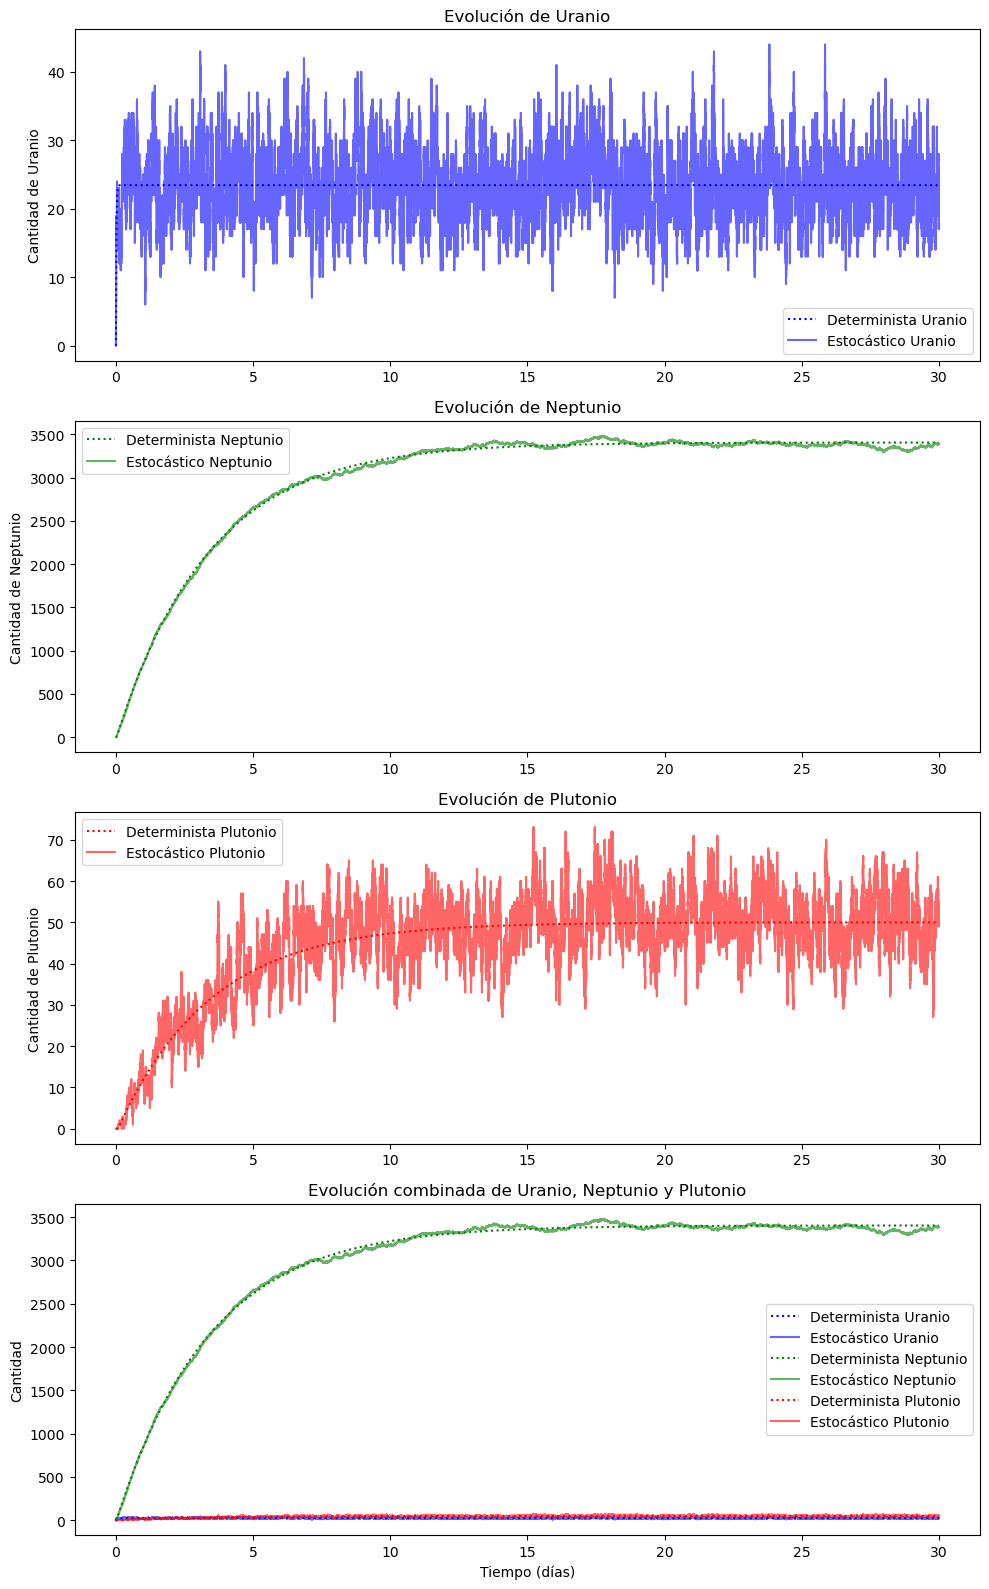

In [89]:
fig, graficas = plt.subplots(4, 1, figsize=(10, 16))
for i in range(3):
    graficas[i].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[i].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)
    graficas[i].set_ylabel(f"Cantidad de {nombres[i]}")
    graficas[i].set_title(f"Evolución de {nombres[i]}")
    graficas[i].legend()

for i in range(3):
    graficas[3].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[3].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)

graficas[3].set_xlabel("Tiempo (días)")
graficas[3].set_ylabel("Cantidad")
graficas[3].set_title("Evolución combinada de Uranio, Neptunio y Plutonio")
graficas[3].legend()

plt.tight_layout()
plt.show()

La solución estocástica siempre muestra ruido respecto a la determinista. Esto se debe a que la variabilidad adicional en las soluciones estocásticas, en comparación con las deterministas, surge porque los modelos estocásticos incluyen componentes aleatorios que simulan incertidumbre o ruido en el sistema. Esto hace que, incluso con las mismas condiciones iniciales, el resultado varíe en cada simulación, reflejando la naturaleza intrínseca de muchos procesos reales donde la aleatoriedad esta presente.

In [90]:
def simulacion_determinista(duracion, paso_tiempo=0.01):
    tiempo = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio = np.zeros_like(tiempo)
    neptunio = np.zeros_like(tiempo)
    plutonio = np.zeros_like(tiempo)

    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  # Condiciones iniciales

    #Bucle para la evolución determinista
    for i in range(1, len(tiempo)):
        cambio_U = tasa_A - constante_U * uranio[i - 1]
        cambio_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        cambio_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + cambio_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + cambio_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + cambio_Pu * paso_tiempo

    return tiempo, uranio, neptunio, plutonio


In [91]:
def simulacion_estocastica_completa(duracion, paso_tiempo=0.01):
    t = 0  # Tiempo inicial
    uranio, neptunio, plutonio = 0, 0, 0  # Cantidades iniciales

    #Listas para almacenar los resultados
    tiempo, lista_U, lista_Np, lista_Pu = [t], [uranio], [neptunio], [plutonio]

    #Bucle de evolución estocástica
    while t < duracion:
        # Tasas de cambio para cada especie
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()

        #Condición para detenerse si no hay eventos
        if tasa_total == 0:
            break

        #Tiempo hasta el siguiente evento
        tau = np.random.exponential(1 / tasa_total)
        t += tau

        #Detenerse si se excede la duración total
        if t > duracion:
            break

        #Determinación del tipo de reacción que ocurre
        reaccion = np.random.choice(4, p=tasas / tasa_total)

        #Actualización de especies en función de la reacción ocurrida
        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        #Registro de los valores en listas
        tiempo.append(t)
        lista_U.append(uranio)
        lista_Np.append(neptunio)
        lista_Pu.append(plutonio)

    return np.array(tiempo), np.array(lista_U), np.array(lista_Np), np.array(lista_Pu)

In [92]:
tasa_A = 1000              #Tasa de producción de uranio
tasa_B = 20                #Tasa de extracción de plutonio
constante_U = np.log(2) / (23.4 / 1440)  #Constante de decaimiento del uranio
constante_Np = np.log(2) / 2.36          #Constante de decaimiento del neptunio
duracion_total = 30        #Duración de la simulación en días
simulaciones = 100         #Número de simulaciones estocásticas
umbral_plutonio = 80       #Umbral de niveles críticos de plutonio

In [93]:
conteo_exitos = 0

In [94]:
for _ in range(simulaciones):
    _, _, _, plutonio_estoc = simulacion_estocastica_completa(duracion_total)
    if np.any(plutonio_estoc >= umbral_plutonio):
        conteo_exitos += 1

In [98]:
probabilidad = conteo_exitos / simulaciones
print(f'Probabilidad de que el nivel de plutonio sea >= {umbral_plutonio}: {probabilidad:.2f}')

Probabilidad de que el nivel de plutonio sea >= 80: 0.19


Se podria aumentar la tasa de extracción de plutonio tasa_B. Al hacerlo, se incrementaría la velocidad de remoción de plutonio, lo que contribuiría a una reducción significativa en su acumulación y, por ende, en la probabilidad de superar el umbral establecido.
Por último, aumentar las constantes de decaimiento del uranio y el neptunio (constante_U y constante_Np) puede ser otra alternativa válida. Un incremento en estas constantes aceleraría la desintegración de ambos isótopos, disminuyendo su presencia en el sistema antes de que los niveles de plutonio alcancen valores críticos.

In [99]:
num_simulaciones=100

In [100]:
uranio_results = []
neptunio_results = []
plutonio_results = []

In [101]:
for _ in range(num_simulaciones):
    _, uranio, neptunio, plutonio = simulacion_estocastica_completa(duracion_total)
    uranio_results.append(uranio[-1])  # Almacenar el último valor de uranio
    neptunio_results.append(neptunio[-1])  # Almacenar el último valor de neptunio
    plutonio_results.append(plutonio[-1])  # Almacenar el último valor de plutonio

In [102]:
media_U = np.mean(uranio_results)
media_Np = np.mean(neptunio_results)
media_Pu = np.mean(plutonio_results)

In [103]:
desviacion_U = np.std(uranio_results)
desviacion_Np = np.std(neptunio_results)
desviacion_Pu = np.std(plutonio_results)

In [104]:
coeficiente_variacion_U = desviacion_U / media_U
coeficiente_variacion_Np = desviacion_Np / media_Np
coeficiente_variacion_Pu = desviacion_Pu / media_Pu

In [105]:
variables = ['Uranio', 'Neptunio', 'Plutonio']
coeficientes_variacion = [coeficiente_variacion_U, coeficiente_variacion_Np, coeficiente_variacion_Pu]

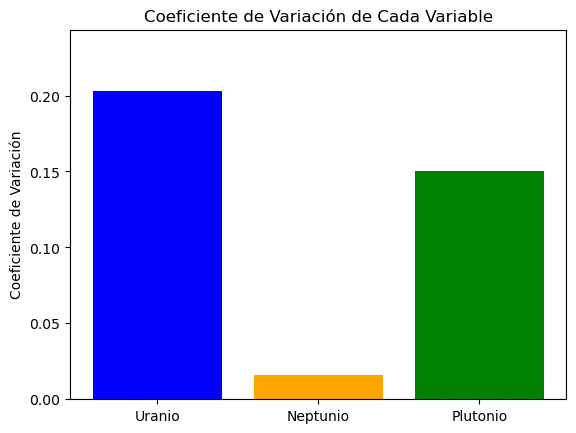

In [106]:
plt.bar(variables, coeficientes_variacion, color=['blue', 'orange', 'green'])
plt.ylabel('Coeficiente de Variación')
plt.title('Coeficiente de Variación de Cada Variable')
plt.ylim(0, max(coeficientes_variacion) * 1.2)  # Ajustar el límite superior del eje y
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

In [107]:
print(f'Coeficiente de variación para Uranio: {coeficiente_variacion_U:.4f}')
print(f'Coeficiente de variación para Neptunio: {coeficiente_variacion_Np:.4f}')
print(f'Coeficiente de variación para Plutonio: {coeficiente_variacion_Pu:.4f}')

Coeficiente de variación para Uranio: 0.2028
Coeficiente de variación para Neptunio: 0.0162
Coeficiente de variación para Plutonio: 0.1500
